In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import pandas as pd
import nltk
from nltk import FreqDist
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("/gdrive/My Drive/MGHectorComments.csv")

In [ ]:
data.head()

,selection1_name
0,Quote:\nOriginally Posted by blackwasp\nThanks...
1,What's happening with the names of cars these ...
2,Quote:\nOriginally Posted by blackwasp\nThanks...
3,Just quickly Googled about this Hector/Baojun ...
4,Quote:\nOriginally Posted by rovingeye\nJust q...


In [ ]:
# remove unwanted characters, numbers and symbols
data['selection1_name'] = data['selection1_name'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
nlp = spacy.load('en_core_web_sm')
len(nlp.Defaults.stop_words)
nlp.Defaults.stop_words.add('Quote')
nlp.Defaults.stop_words.add('but')
nlp.Defaults.stop_words.add('the')

In [ ]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in nlp.Defaults.stop_words])
    return rev_new

# remove short words (length < 3)
data['selection1_name'] = data['selection1_name'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in data['selection1_name']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

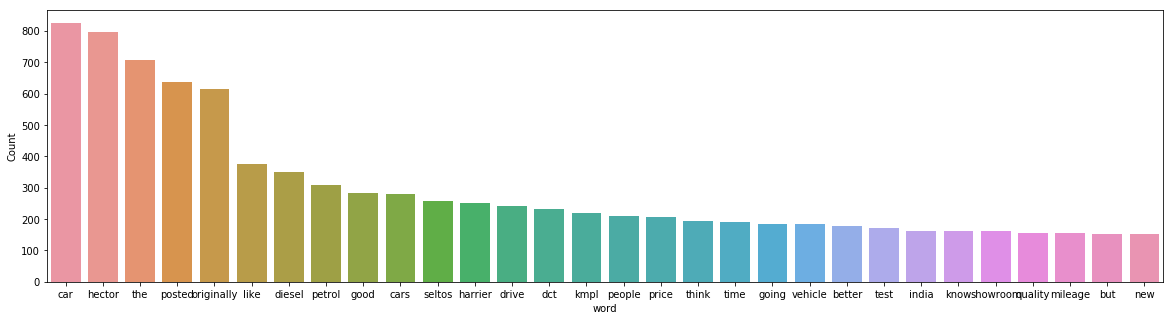

In [ ]:
freq_words(reviews,30)

# Entity

In [ ]:
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
reveiew_string = ""
reveiew_string = ' '.join([text for text in reviews])

In [ ]:
article = nlp(reveiew_string)

In [ ]:
print(article)

originally posted blackwasp thanks automobiles encyclopedia sending images seen times city got chance click picture imposing what happening names cars days first harrier hector harrier place hector historically letters names india kept combination when historically people refer originally posted blackwasp thanks automobiles encyclopedia sending images heartfelt gratitude sharing enthusiasts team bhp page attachment seems like car huge rear overhang like alturas that thing hate cars makes look like bus and simply understand couldn replace vector mean seriously sound awkward conversations guy hey man bought new car guy great which guy hector guy hector guy new hector hector guy stares dude face second awkwardness pretends understand talking just quickly googled hector baojun chevy captiva true hector captiva just looks guts originally posted rovingeye just quickly googled hector baojun chevy captiva true hector captiva just looks guts you bang take look https www youtube com watch ykt ht

In [ ]:
len(article.ents)

707

In [ ]:
# Import PhraseMatcher and create a matcher object:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
# Create the desired phrase patterns:
phrase_list = ['harrier']
phrase_patterns = [nlp(text) for text in phrase_list]

In [ ]:
# Apply the patterns to our matcher object:
matcher.add('newproduct', None, *phrase_patterns)

# Apply the matcher to our Doc object:
matches = matcher(article)

# See what matches occur:
matches

[(2689272359382549672, 22, 23),
 (2689272359382549672, 24, 25),
 (2689272359382549672, 568, 569),
 (2689272359382549672, 570, 571),
 (2689272359382549672, 648, 649),
 (2689272359382549672, 1142, 1143),
 (2689272359382549672, 1848, 1849),
 (2689272359382549672, 1916, 1917),
 (2689272359382549672, 2453, 2454),
 (2689272359382549672, 2753, 2754),
 (2689272359382549672, 3060, 3061),
 (2689272359382549672, 3075, 3076),
 (2689272359382549672, 3087, 3088),
 (2689272359382549672, 3116, 3117),
 (2689272359382549672, 3171, 3172),
 (2689272359382549672, 4140, 4141),
 (2689272359382549672, 4147, 4148),
 (2689272359382549672, 4159, 4160),
 (2689272359382549672, 4173, 4174),
 (2689272359382549672, 4182, 4183),
 (2689272359382549672, 4199, 4200),
 (2689272359382549672, 4243, 4244),
 (2689272359382549672, 5252, 5253),
 (2689272359382549672, 5265, 5266),
 (2689272359382549672, 7017, 7018),
 (2689272359382549672, 8300, 8301),
 (2689272359382549672, 8418, 8419),
 (2689272359382549672, 9821, 9822),
 (2689

In [ ]:
# Here we create Spans from each match, and create named entities from them:
from spacy.tokens import Span

PROD = article.vocab.strings[u'PRODUCT']

new_ents = [Span(article, match[1],match[2],label=PROD) for match in matches]

article.ents = list(article.ents) + new_ents

In [ ]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'CARDINAL': 74,
         'DATE': 463,
         'MONEY': 1,
         'NORP': 33,
         'ORDINAL': 56,
         'PRODUCT': 251,
         'QUANTITY': 3,
         'TIME': 77})

In [ ]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('harrier', 251), ('months', 61), ('today', 56)]

In [ ]:
sentences = [x for x in article.sents]
print(sentences[20])

sure camouflage find little wheeled needs bigger rims hate fact poor road infrastructure manufacturer increase rubber decrease wheel size models this ensure incomplete look originally posted saisw seems like car huge rear overhang like alturas that thing hate cars makes look like bus and simply understand couldn replace vector mean


In [ ]:
displacy.render(nlp(str(sentences[20])), style='dep', jupyter = True, options = {'distance': 120})

In [ ]:
dict([(str(x), x.label_) for x in nlp(str(sentences[:])).ents])

In [ ]:

displacy.render(article, style='ent', jupyter=True)

In [ ]:
colors = {'ORG': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)', 'PRODUCT': 'radial-gradient(yellow, green)'}

options = {'ents': ['ORG', 'PRODUCT'], 'colors':colors}

displacy.render(article, style='ent', jupyter=True, options=options)